## Code to generate Figure 4C-D graphics
This code generates the Rg distributions in Figures 4C-D for Ash1 vs. pAsh1 and PAGE4 vs. pPAGE4, beginning with csv files of per-frame Rg for each of 10 replicate simulations. Each .csv contains 10 columns and n Rg values, where n is the number of frames in the simulation.

This code loads csv files from 'data/'.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
## load csv files with end-to-end distances (Ree) from replicates ##
# 'reps' indicates the data are organized per-replicate (instead of merged)

Ash1 = np.loadtxt('data/Ash1_apo_Rg_reps.csv')
pAsh1 = np.loadtxt('data/Ash1_10x_phos_Rg_reps.csv')

PAGE4 = np.loadtxt('data/PAGE4_apo_Rg_reps.csv')
pPAGE4 = np.loadtxt('data/PAGE4_8x_phos_Rg_reps.csv')

seqs = ['Ash1', 'pAsh1', 'PAGE4', 'pPAGE4']
all_Rgs = [Ash1, pAsh1, PAGE4, pPAGE4]

In [11]:
## merge data across replicates and calculate average & std Rg for all peptides ##
# also perform some data management steps (put all data into a dataframe for easy downstream analyis)

rep_avgs = []
cat_data = []
for j in range(0, len(seqs)):    
    replicate = all_Rgs[j]
    rep_avgs.append(np.mean(replicate, axis = 1))
    
    cat_data.append(replicate.reshape(-1, 1))
    
avg_avg = []
avg_std = []
for b in range(0, len(rep_avgs)):
    avg_avg.append(np.mean(rep_avgs[b]))
    avg_std.append(np.std(rep_avgs[b]))
    
ave_round = np.round(avg_avg, 1)
std_round = np.round(avg_std, 1)

stack = np.column_stack([cat_data[0], cat_data[1], cat_data[2], cat_data[3]])
Rg_dff = pd.DataFrame(stack, columns = seqs)

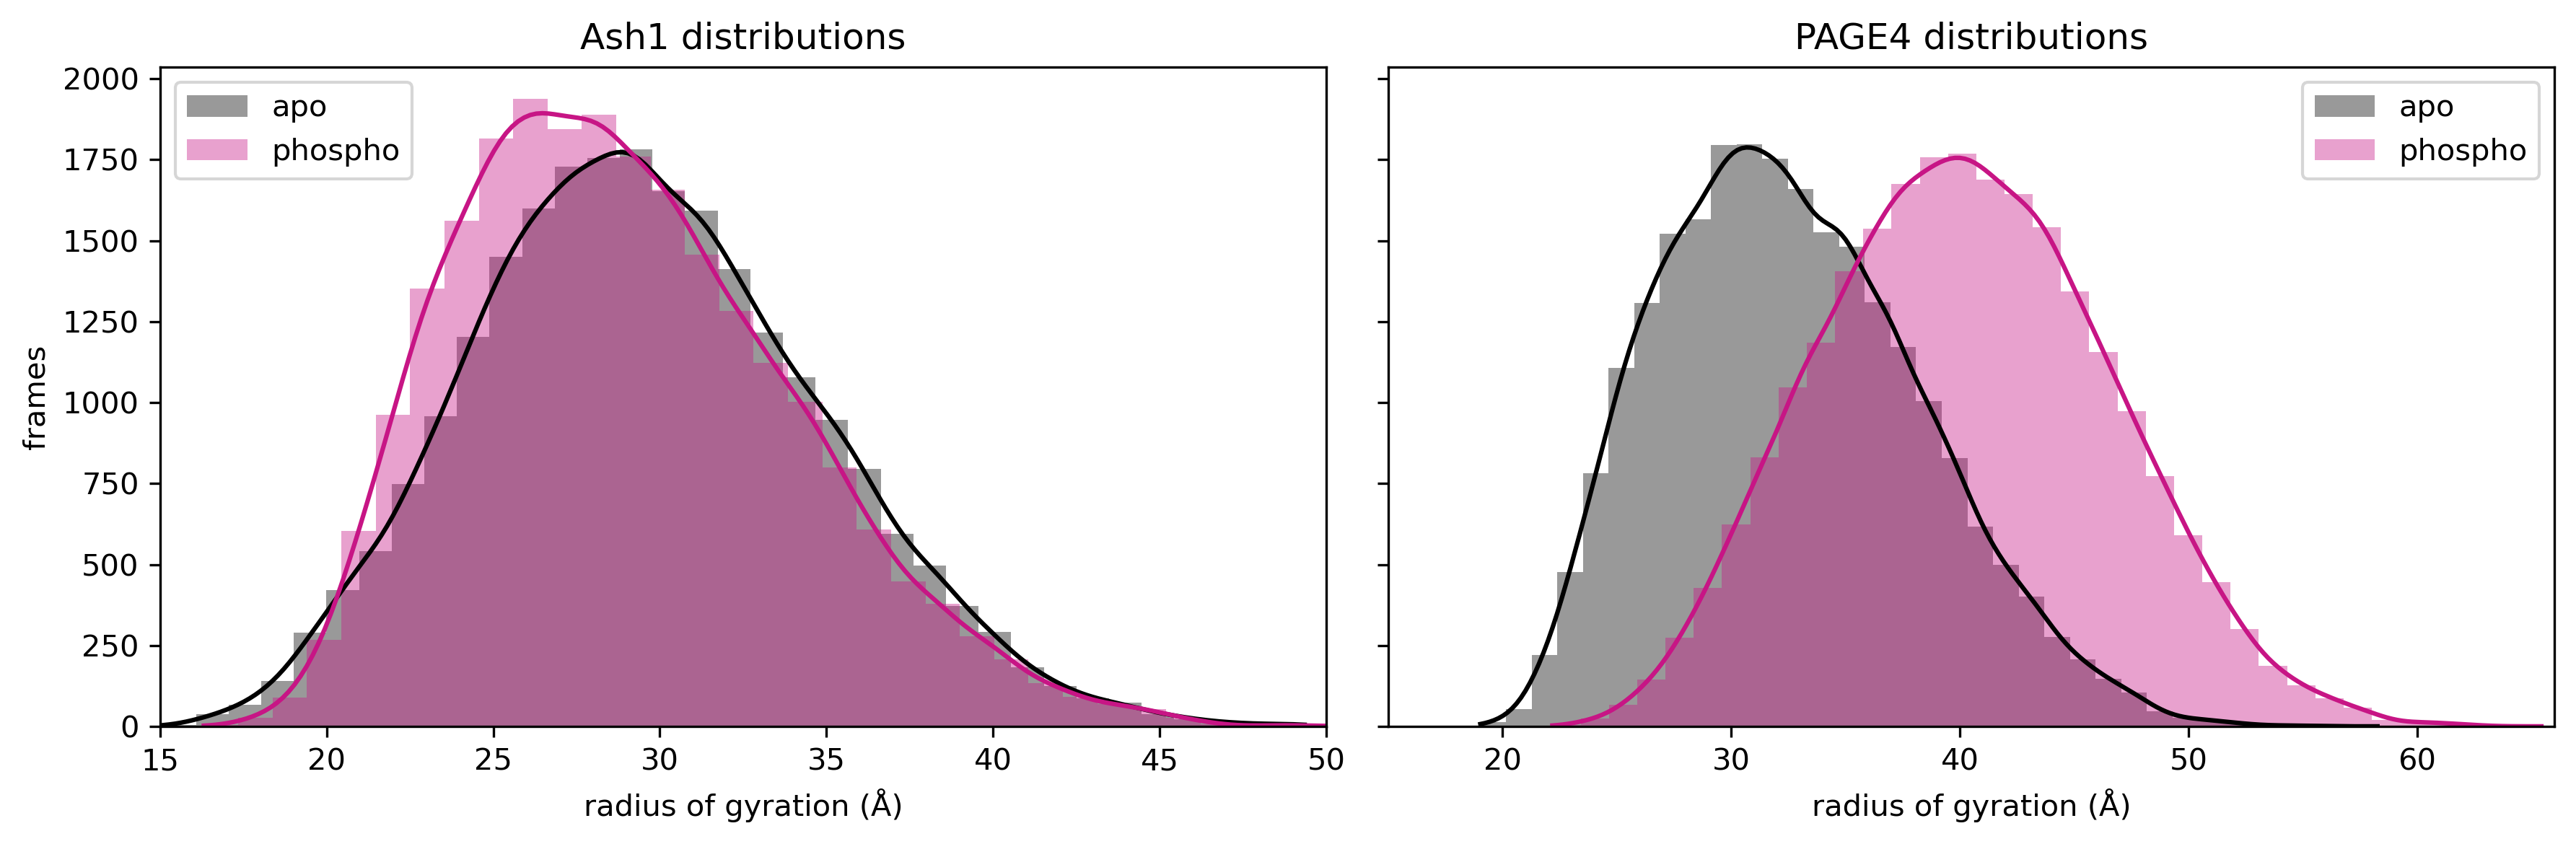

In [14]:
## generate Rg distribution graphics (PANELS C & D) ##

fig, axes = plt.subplots(1, 2, figsize = (12, 4), dpi = 300, sharey = True)

# plot Ash1/pAsh1 on left axis (panel C)
sns.histplot(data=Rg_dff, ax = axes[0], x = "Ash1", color = "k", alpha = 0.4, lw = 0, label="apo", fill = True, bins = 35, kde = True)
sns.histplot(data=Rg_dff, ax = axes[0], x = "pAsh1", color = "mediumvioletred", lw = 0, alpha = 0.4, label="phospho", fill = True, bins = 35, kde = True)

# plot PAGE4/pPAGE4 on right axis (panel D)
sns.histplot(data=Rg_dff, ax = axes[1], x = "PAGE4", color = "k", alpha = 0.4, lw = 0, label="apo", fill = True, bins = 35, kde = True)
sns.histplot(data=Rg_dff, ax = axes[1], x = "pPAGE4", color = "mediumvioletred", lw = 0, alpha = 0.4, label="phospho", fill = True, bins = 35, kde = True)

axes[0].set_ylabel('frames')
axes[0].set_xlabel('radius of gyration (Å)')
axes[0].set_title('Ash1 distributions')
axes[0].legend(loc = 'upper left')
axes[0].set_xlim([15, 50])

axes[1].set_xlabel('radius of gyration (Å)')
axes[1].set_title('PAGE4 distributions')
axes[1].legend(loc = 'upper right')
axes[1].set_xlim([15, 66])

plt.tight_layout()

plt.savefig('Ash1+PAGE4_Rg_dists_4CD.pdf', format = 'pdf', dpi = 300)

plt.show() 